# Tarea 4 | Visualización de Datos | Magíster en Ciencias de Datos UC 
---
## Luciano Davico
---

### Importamos los datos

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [140]:
wines_df = pd.read_csv('winequality-red-Tarea-final.csv')
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [141]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 1. Visualizaciones del dataset

#### a. Histograma sobre una columna

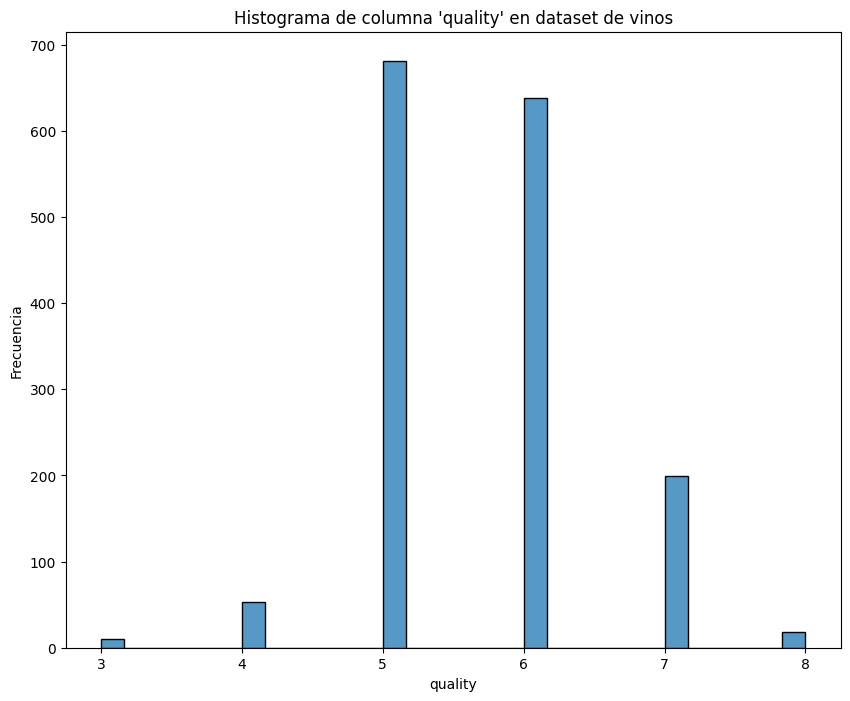

In [142]:
# Utilizaremos el target 'quality'
ax_1a = sns.histplot(data=wines_df, x='quality')
ax_1a.set_xlabel('quality')
ax_1a.set_ylabel('Frecuencia')
ax_1a.set_title(f"Histograma de columna 'quality' en dataset de vinos")
plt.show()

#### b. Gráfico de burbujas

Primero generamos una columna con cuatro intervalos de grado alcoholico según sus cuartiles.

In [143]:
q1 = np.percentile(wines_df.alcohol, 25)
q2 = np.percentile(wines_df.alcohol, 50)
q3 = np.percentile(wines_df.alcohol, 75)
q4 = np.percentile(wines_df.alcohol, 100)

def set_quartile_classification(data, q1, q2, q3, q4):
    if data.alcohol <= q1:
        return f'[0, {q1}]'
    elif data.alcohol > q1 and data.alcohol <= q2:
        return f']{q1}, {q2}]'
    elif data.alcohol > q2 and data.alcohol <= q3:
        return f']{q2}, {q3}]'  
    else:
        return f']{q3}, {q4}]'

In [144]:
wines_df['alcohol_interval'] = wines_df.apply(lambda x: set_quartile_classification(x, q1, q2, q3, q4), axis=1)
wines_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_interval
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,"[0, 9.5]"
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,"]9.5, 10.2]"
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,"]9.5, 10.2]"
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,"]9.5, 10.2]"
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,"[0, 9.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,"]10.2, 11.1]"
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,"]11.1, 14.9]"
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,"]10.2, 11.1]"
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,"]9.5, 10.2]"


Seleccionamos las columnas `fixed acidity` y `volatile acidity` para los ejes `x` e `y`, respectivamente.

Utilizaremos la variable categórica `alcohol_interval` con el canal de color de cada burbuja, dado que es una variable categórica.

Utilizaremos la variable `quality` con el canal de tamaño de cada burbuja, siendo el tamaño de cada burbuja proporcional al dato de dicha columna.

In [145]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  alcohol_interval      1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


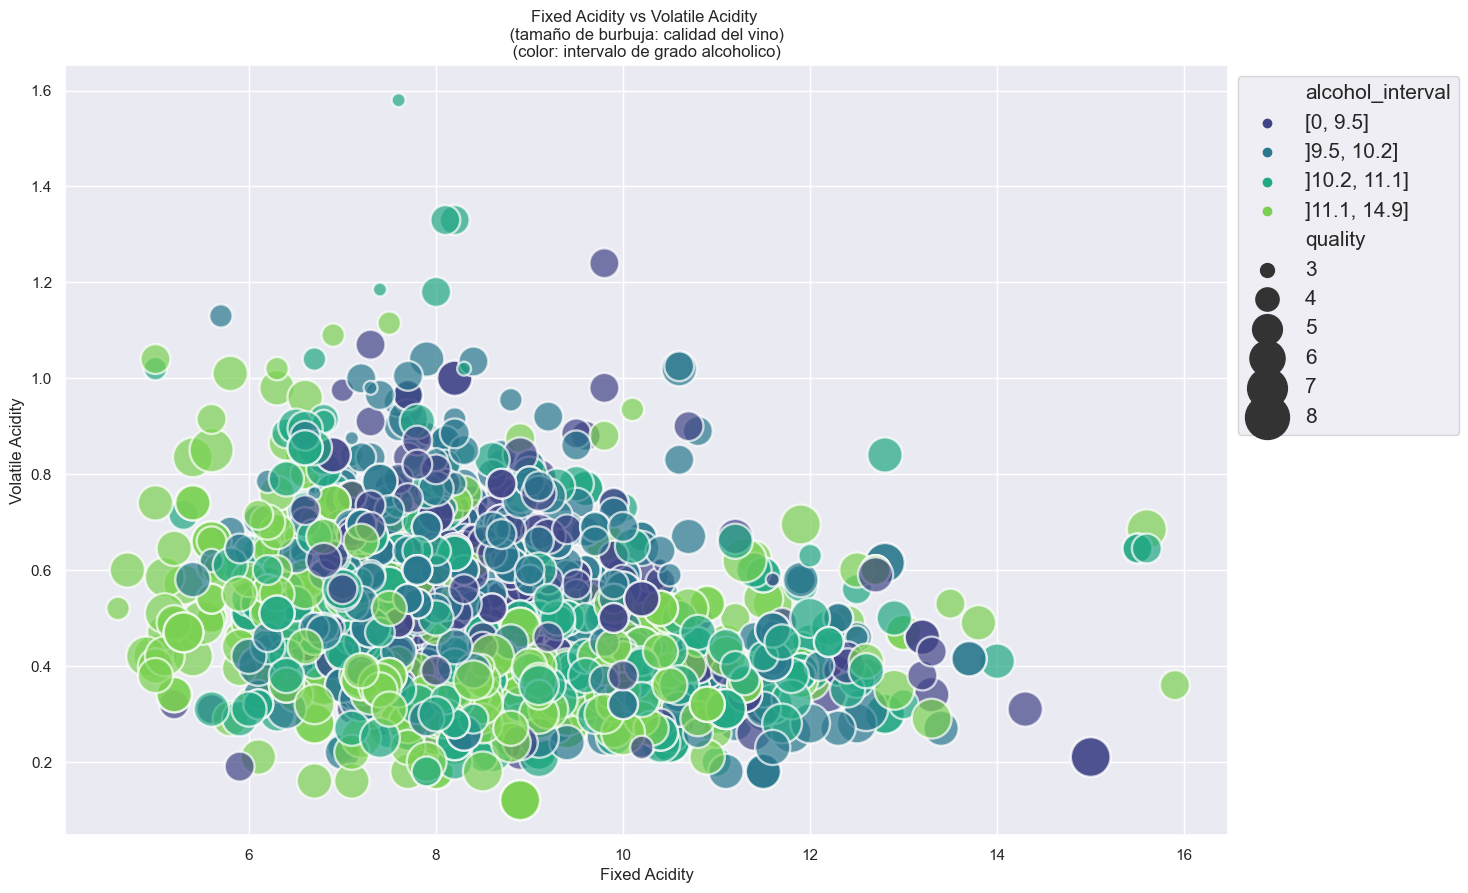

In [146]:
sns.set(rc={'figure.figsize':(15, 10)})


ax_1b = sns.scatterplot(x='fixed acidity', y='volatile acidity',
                     hue='alcohol_interval', size='quality',
                     #size='quality',
                     sizes=(100, 1000), alpha=0.7, palette='viridis', data=wines_df)

ax_1b.set_title('Fixed Acidity vs Volatile Acidity \n (tamaño de burbuja: calidad del vino) \n (color: intervalo de grado alcoholico) ')
ax_1b.set_xlabel('Fixed Acidity')
ax_1b.set_ylabel('Volatile Acidity')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15)

plt.show()

#### c. Gráfico de dispersión

Elegimos las columnas `fixed acidity` y `residual sugar` para los ejes **x** e **y**, respectivamente.

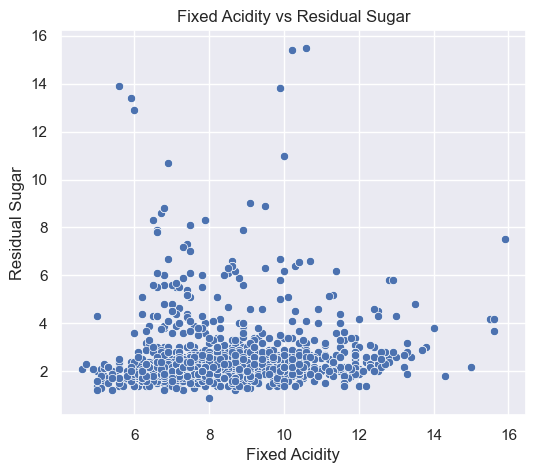

In [147]:
sns.set(rc={'figure.figsize':(6, 5)})


ax_1c = sns.scatterplot(x='fixed acidity', y='residual sugar', data=wines_df)

ax_1c.set_title('Fixed Acidity vs Residual Sugar')
ax_1c.set_xlabel('Fixed Acidity')
ax_1c.set_ylabel('Residual Sugar')

plt.show()

#### d. Matriz de gráficos de dispersión

Utilizaremos las columnas con datos cuantitativos continuos, las cuales serán `residual sugar`, `fixed acidity`, `citric acid` y `chlorides`

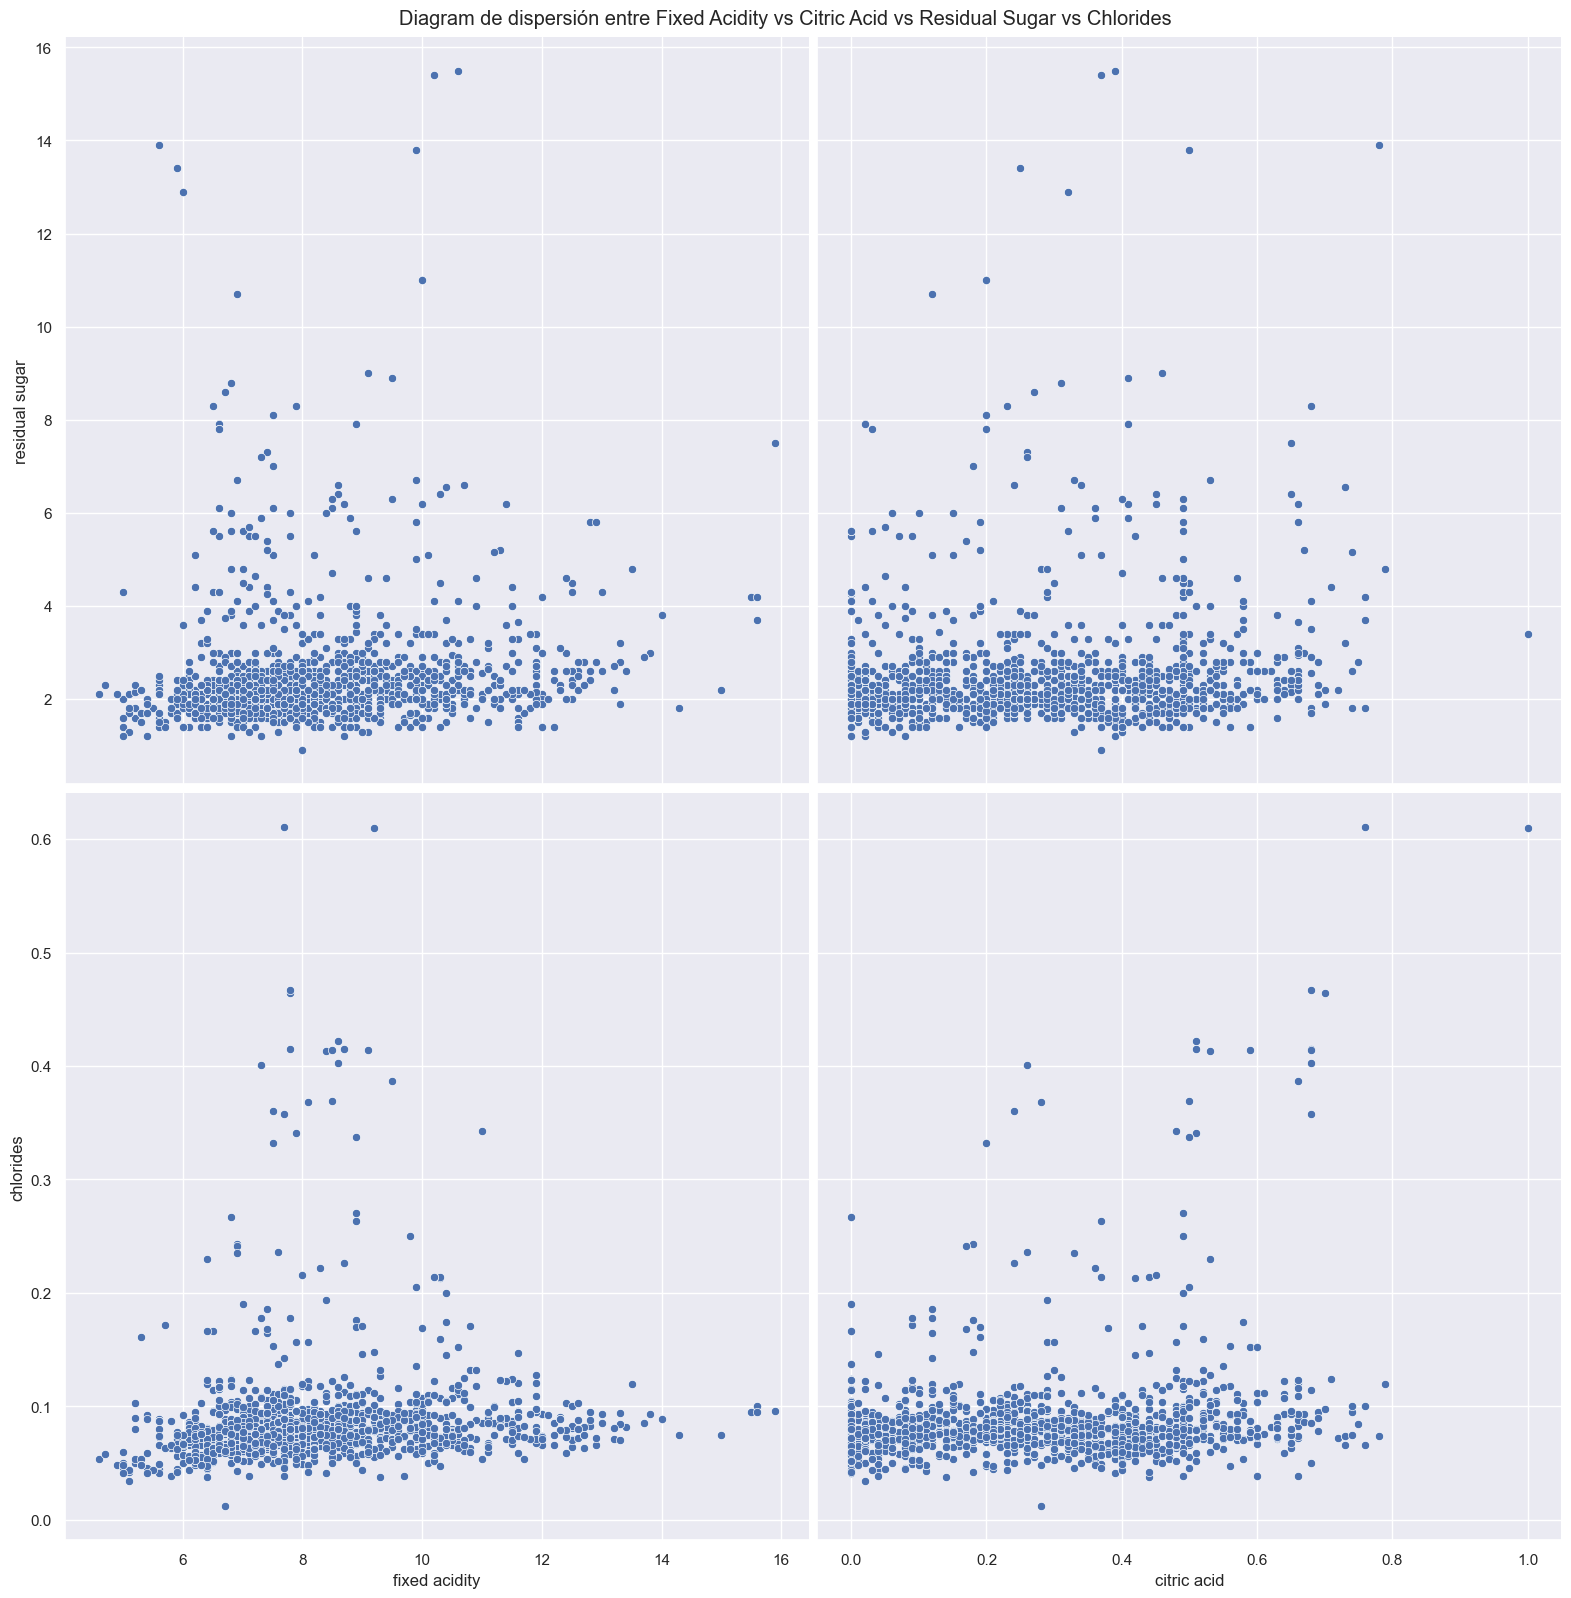

In [148]:
ax_1d = sns.pairplot(wines_df,
                 x_vars=['fixed acidity', 'citric acid'],
                 y_vars=['residual sugar', 'chlorides'], kind='scatter', height=8)
ax_1d.fig.suptitle('Diagram de dispersión entre Fixed Acidity vs Citric Acid vs Residual Sugar vs Chlorides', y=1.002)
plt.show()

#### e. Gráfico de densidad

Creamos la columna binaria `quality_binary` que separa vinos de buena y mala calidad según el criterio de buena calidad (>5) o mala calidad (5>=).

In [149]:
wines_df['quality_binary'] = wines_df['quality'].apply(lambda x: 'good' if x > 5 else 'bad')
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_interval,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,"[0, 9.5]",bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,"]9.5, 10.2]",bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,"]9.5, 10.2]",bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,"]9.5, 10.2]",good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,"[0, 9.5]",bad


Generamos el gráfico de densidad de la variable `pH`, incluyendo la separación por buen y mal vino.

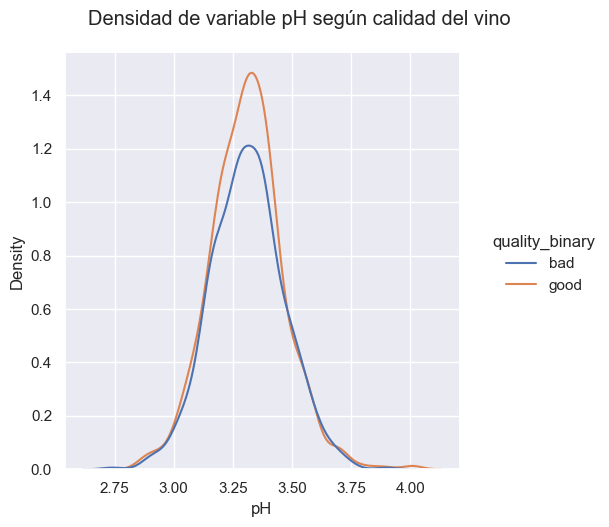

In [150]:
ax_1e = sns.displot(data=wines_df, x='pH', kind='kde', hue='quality_binary')
ax_1e.fig.suptitle('Densidad de variable pH según calidad del vino', y=1.05)
plt.show()

#### f. Gráfico de torta

Agrupamos los vinos según calidad y contamos.

In [151]:
grouped_quality_df = pd.DataFrame(wines_df.groupby('quality')[['quality']].count())
grouped_quality_df = grouped_quality_df.rename(columns={'quality': 'count'}).reset_index()
grouped_quality_df

,quality,count
0,3,10
1,4,53
2,5,681
3,6,638
4,7,199
5,8,18


Graficamos el pie chart

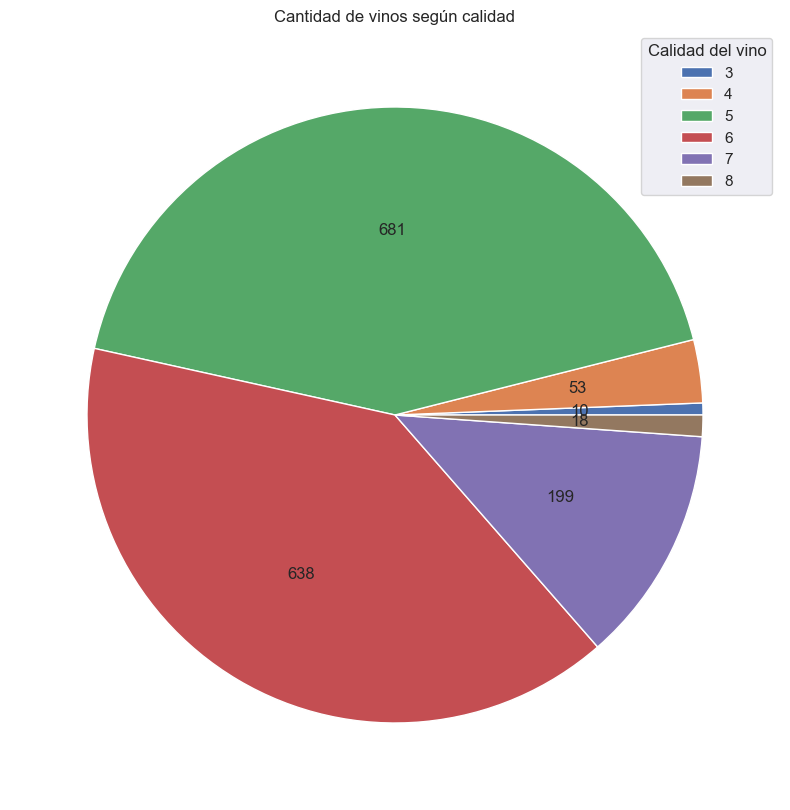

In [152]:
fig = plt.figure(figsize=(10,10))
plot = fig.add_subplot()
def absolute_value(val):
    a  = round(val/100.*np.sum(grouped_quality_df['count']))
    return a

piechart_d = plot.pie(grouped_quality_df['count'], autopct=absolute_value)
plot.legend(piechart_d[0], grouped_quality_df['quality'], title='Calidad del vino')
plot.set_title('Cantidad de vinos según calidad')

plt.show()

#### g. Small múltiples de histograma

Generamos una grilla para dejar nuestros histogramas según calidad, para cada una de las columnas del dataset.

In [153]:
wines_df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'alcohol_interval',
 'quality_binary']

In [154]:
wines_df[wines_df.quality == 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_interval,quality_binary
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3,"[0, 9.5]",bad
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3,"[0, 9.5]",bad
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3,"]10.2, 11.1]",bad
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3,"]9.5, 10.2]",bad
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3,"]10.2, 11.1]",bad
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3,"]10.2, 11.1]",bad
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3,"]9.5, 10.2]",bad
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3,"]9.5, 10.2]",bad
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3,"]9.5, 10.2]",bad
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,"]9.5, 10.2]",bad


Para cada columna, generamos el histograma según calidad del vino

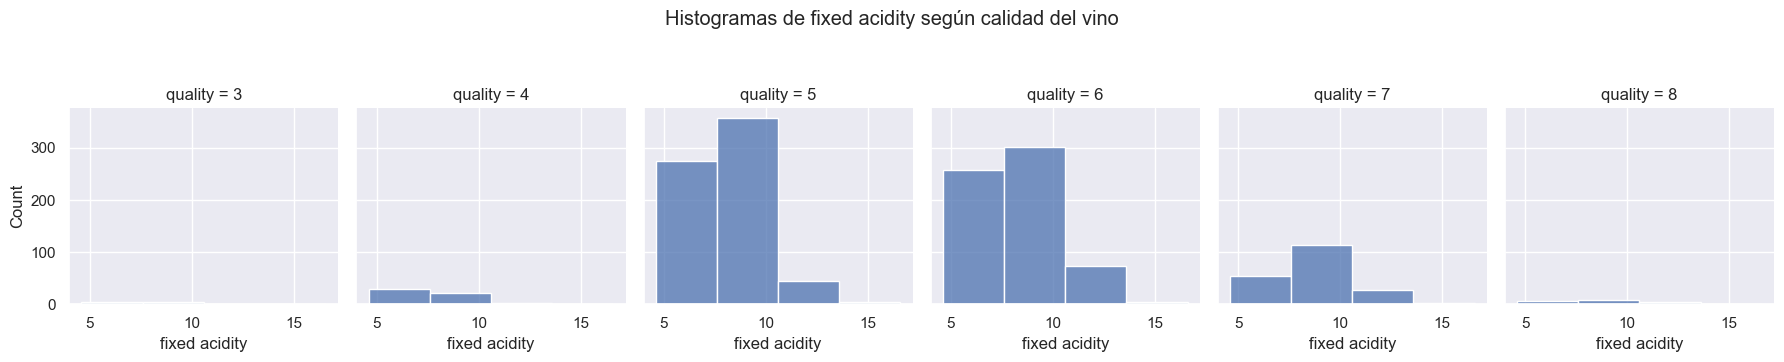

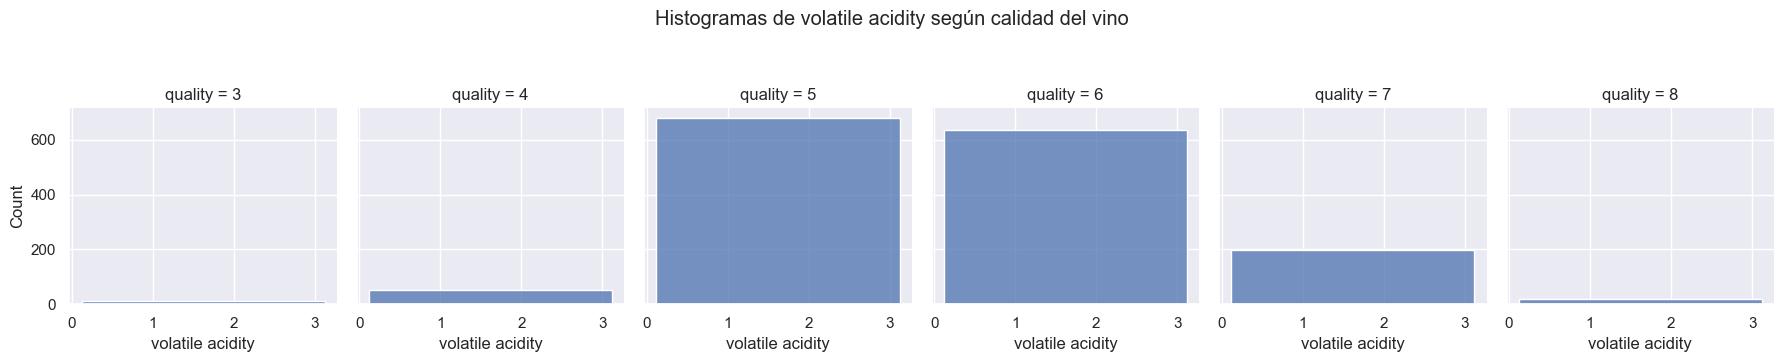

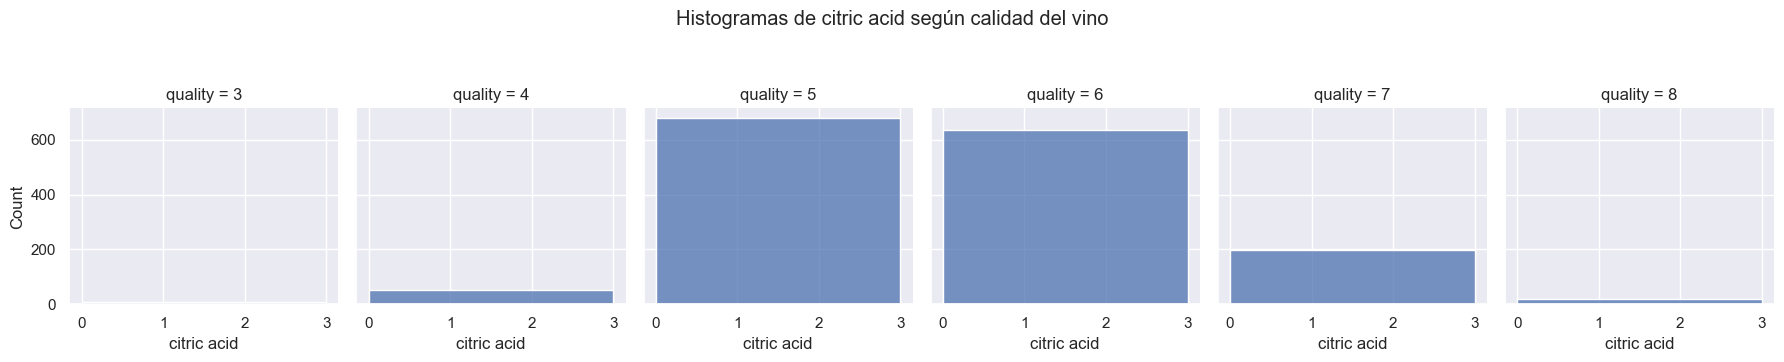

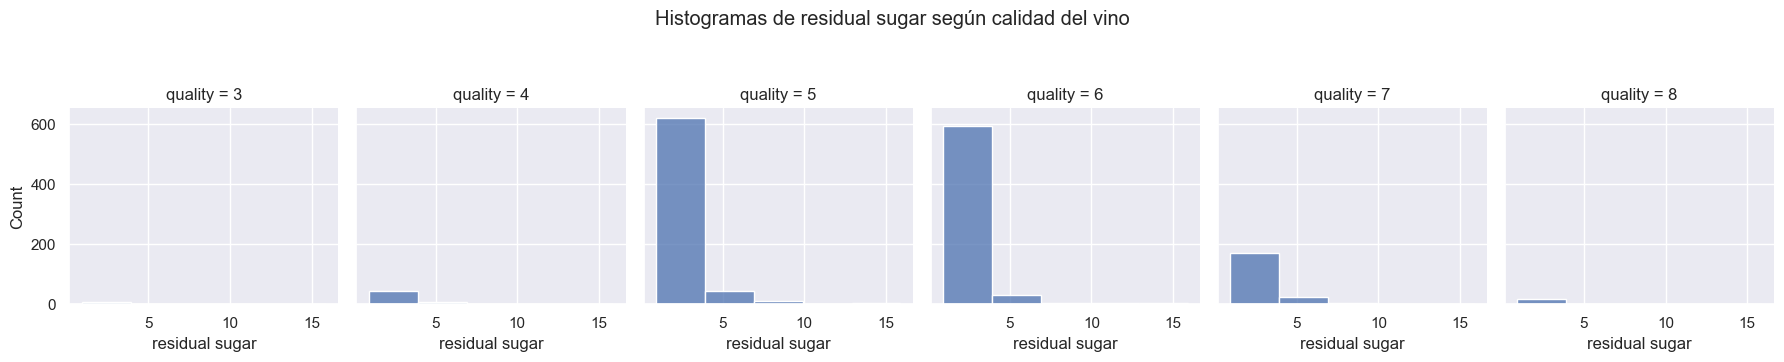

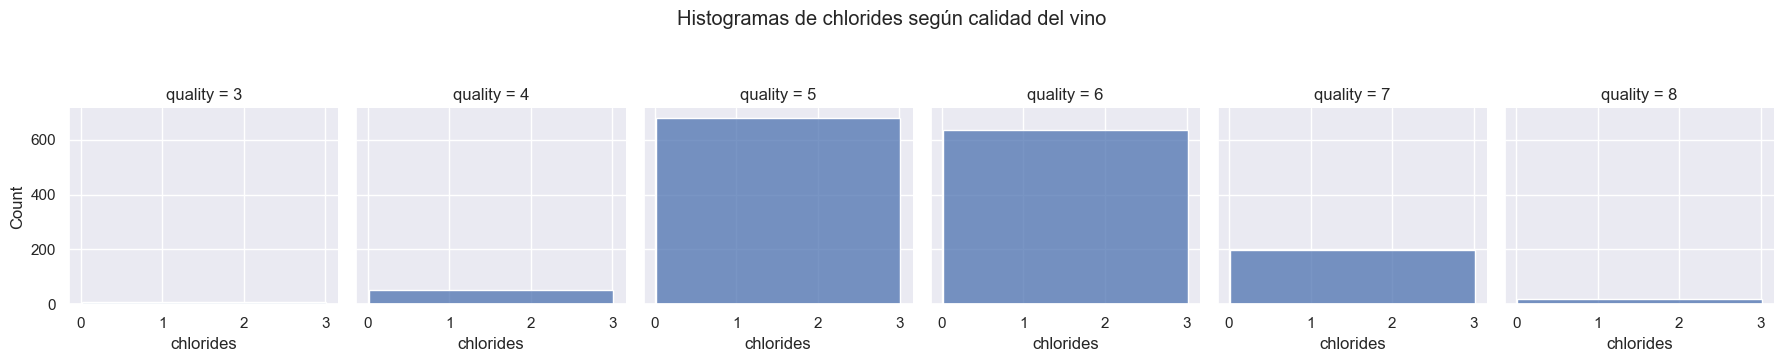

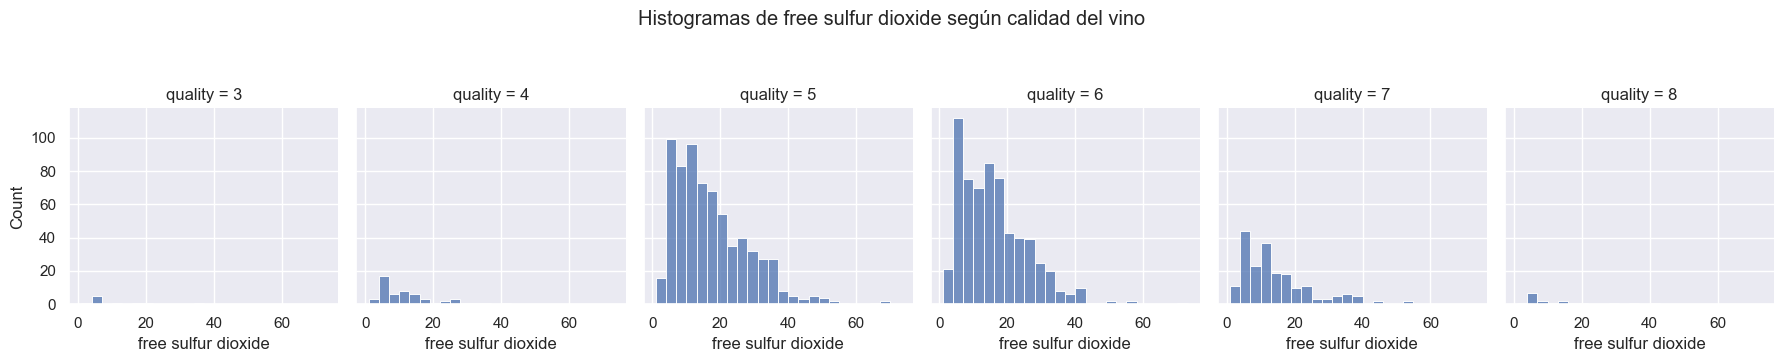

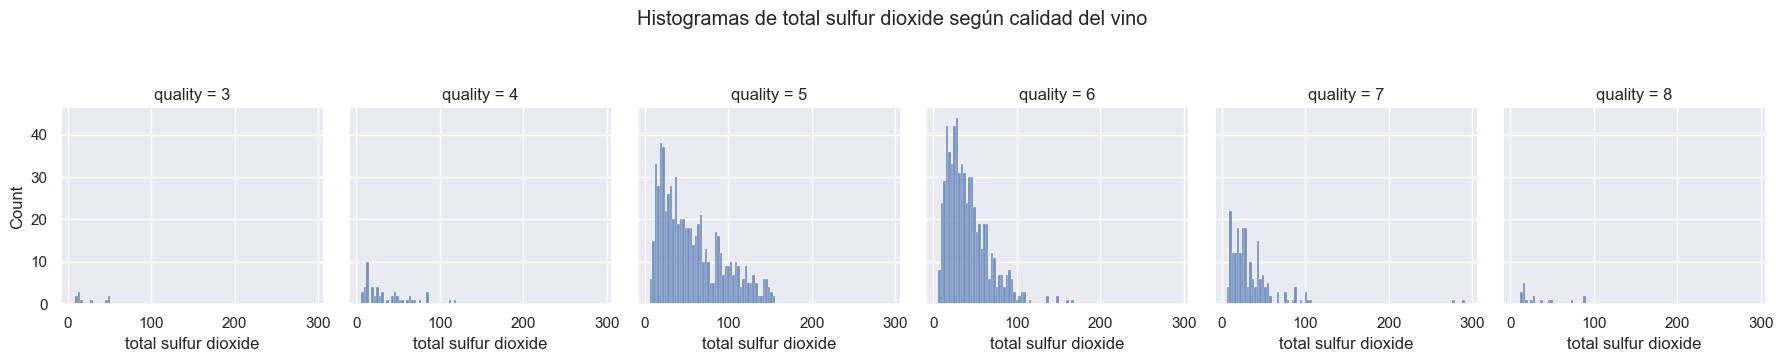

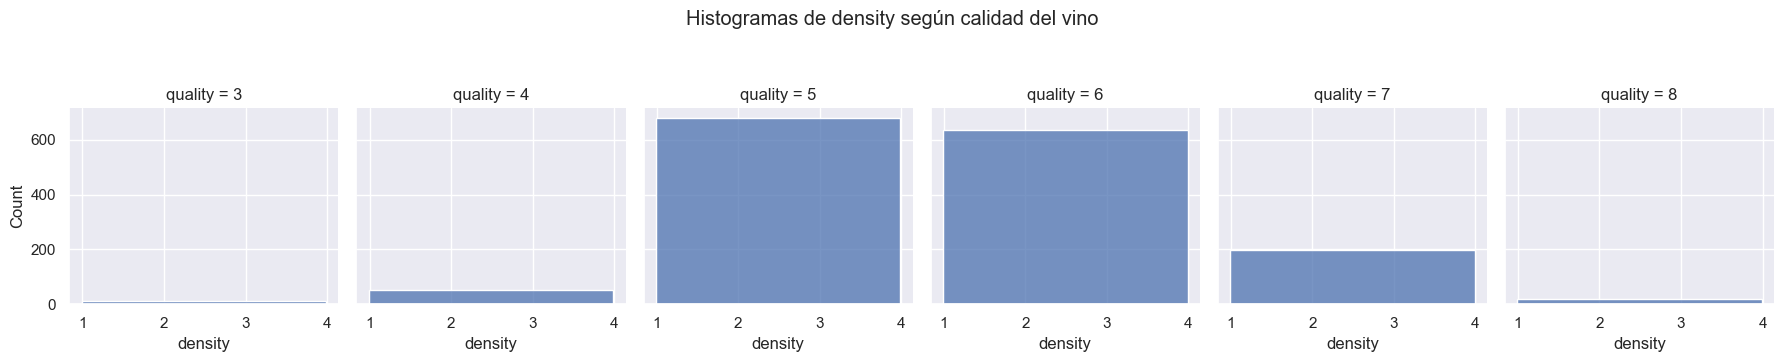

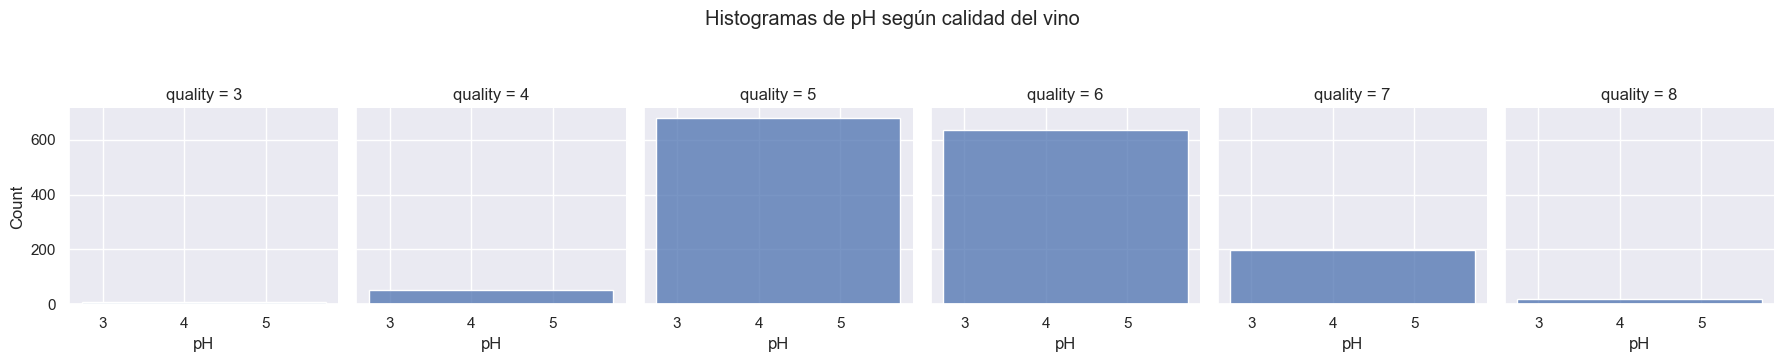

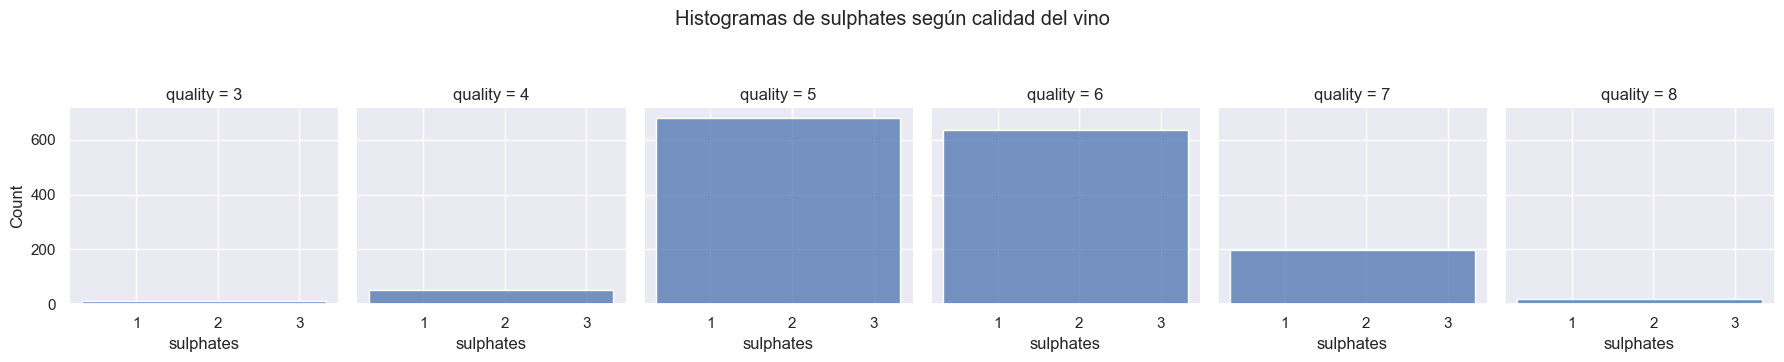

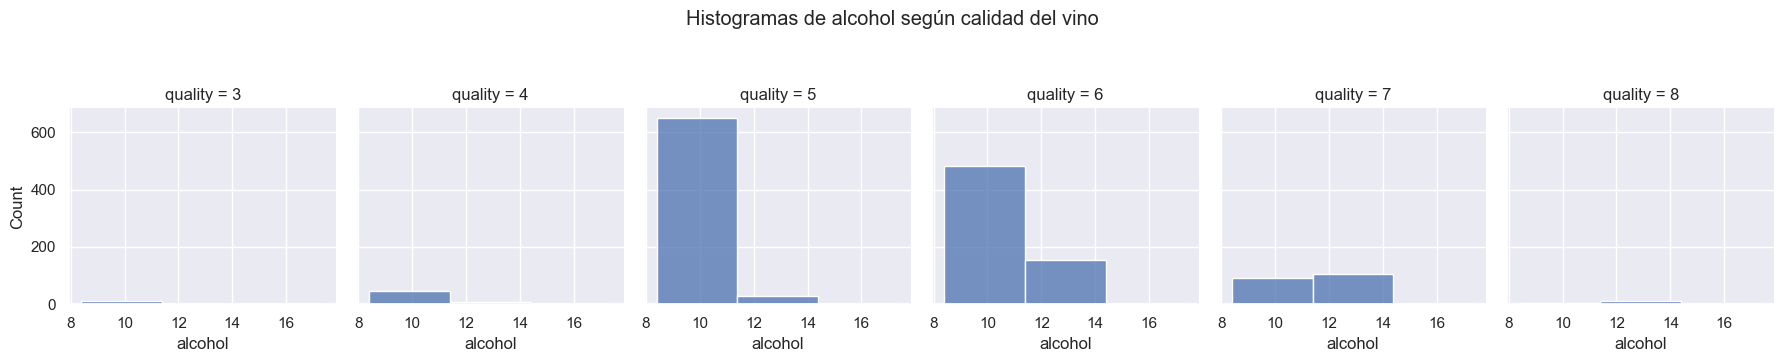

In [155]:
for col in wines_df.columns.tolist():
    if col == 'quality' or col == 'alcohol_interval' or col == 'quality_binary':
        continue
    ax_1g = sns.displot(
        wines_df, x=col, col='quality',
        binwidth=3, height=3, facet_kws=dict(margin_titles=True),
    )
    ax_1g.fig.suptitle(f'Histogramas de {col} según calidad del vino', y=1.2)
    plt.show()

#### h. Gráfico de violín

Para este gráfico, utilizaremos la separación en cuartiles de intervalo de grado alcohólico, denotados por la columna `alcohol_interval` y la columna `alcohol`. Asimismo, utilizaremos `quality_binary` para separar entre buena y mala calidad del vino.

In [156]:
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_interval,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,"[0, 9.5]",bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,"]9.5, 10.2]",bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,"]9.5, 10.2]",bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,"]9.5, 10.2]",good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,"[0, 9.5]",bad


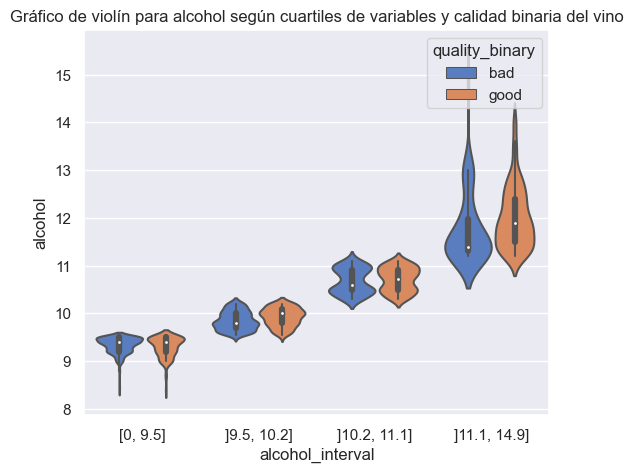

In [157]:
ax_1h = sns.violinplot(x='alcohol_interval', y='alcohol', hue='quality_binary',
                    data=wines_df, palette="muted")
ax_1h.set_title('Gráfico de violín para alcohol según cuartiles de variables y calidad binaria del vino')
plt.show()

### 2. Visualización de nube de palabras

Para la visualización, la palabra que se utilizará con el contenido de Wikipedia será `Italia`. En este sentido, primero graficaremos los textos como rectángulo y luego de la forma del país.

In [158]:
import wikipedia
import wordcloud
from PIL import Image

Obtenemos el contenido del artículo "Italia" en Wikipedia

In [159]:
word = 'Italia'

In [160]:
page = wikipedia.page(word, auto_suggest=False)
content = page.content

#### Visualización rectangular

Obtenemos las stopwords y generamos la visualización

In [163]:
stopwords = set(wordcloud.STOPWORDS) 
wc = wordcloud.WordCloud(background_color='white', max_words=200,
                stopwords= stopwords)
wc.generate(content)

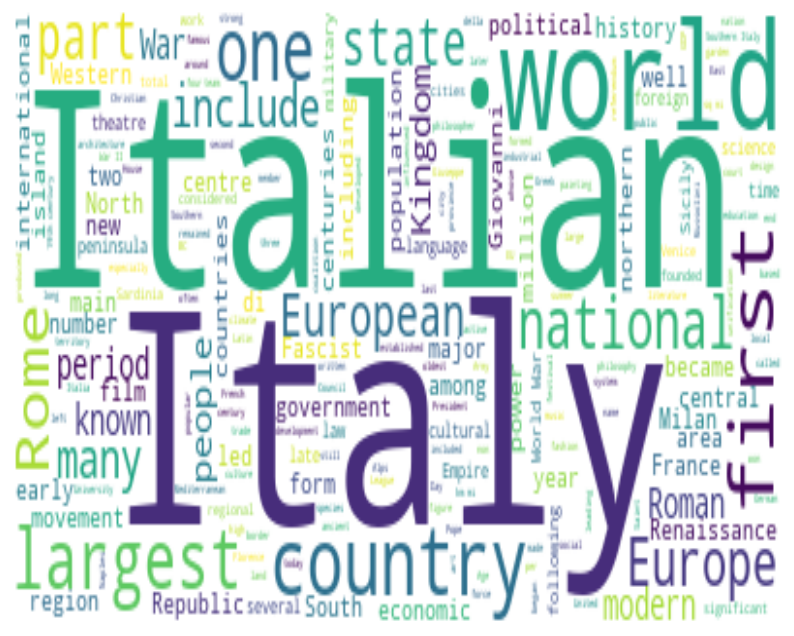

In [164]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.imshow(wc, interpolation='bilinear', aspect='auto')
plt.axis('off')
plt.show()

#### Visualización en forma de país

Debemos crear la máscara para visualizar acorde a la forma que indique la máscara.

In [165]:
sa_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Italian_regions_provinces.svg/600px-Italian_regions_provinces.svg.png'
sa_image_name = 'italy.png'

Descargamos la imagen

In [166]:
from urllib.request import urlretrieve

urlretrieve(sa_image_url, sa_image_name)

('italy.png', <http.client.HTTPMessage at 0x2b085c150>)

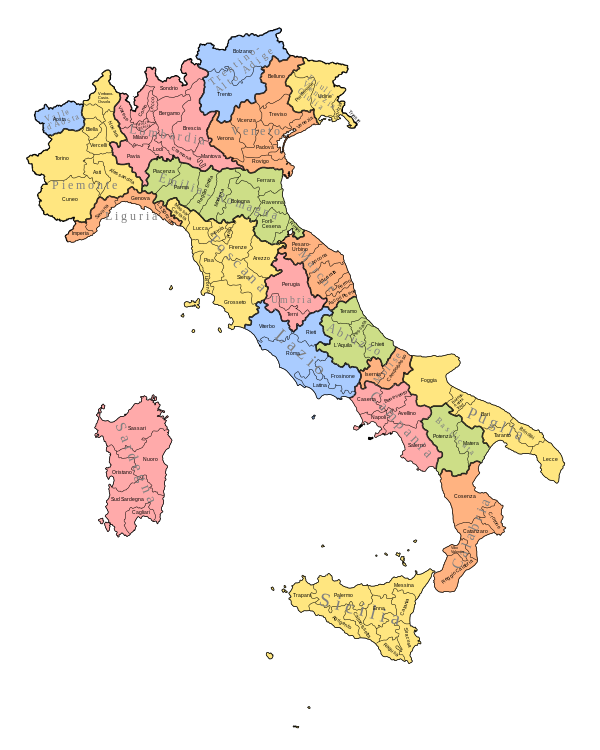

In [167]:
img = Image.open('italy.png')
img

Debemos setear el fondo de la imagen como blanco, obteniendo así la máscara correcta

In [168]:
sa_mask = np.array(img)

for i in range(len(sa_mask)):
    for j in range(len(sa_mask[i])):
        if sa_mask[i][j][0] == 0 and sa_mask[i][j][1] == 0 and sa_mask[i][j][2] == 0 and sa_mask[i][j][3] == 0:
            sa_mask[i][j][0] = 255
            sa_mask[i][j][1] = 255
            sa_mask[i][j][2] = 255
            sa_mask[i][j][3] = 255

Generamos la visualización acorde a la máscara entregada

In [169]:
wc_sa = wordcloud.WordCloud(background_color='white', mask=sa_mask, max_words=200,
                stopwords=stopwords)
wc_sa.generate(content)

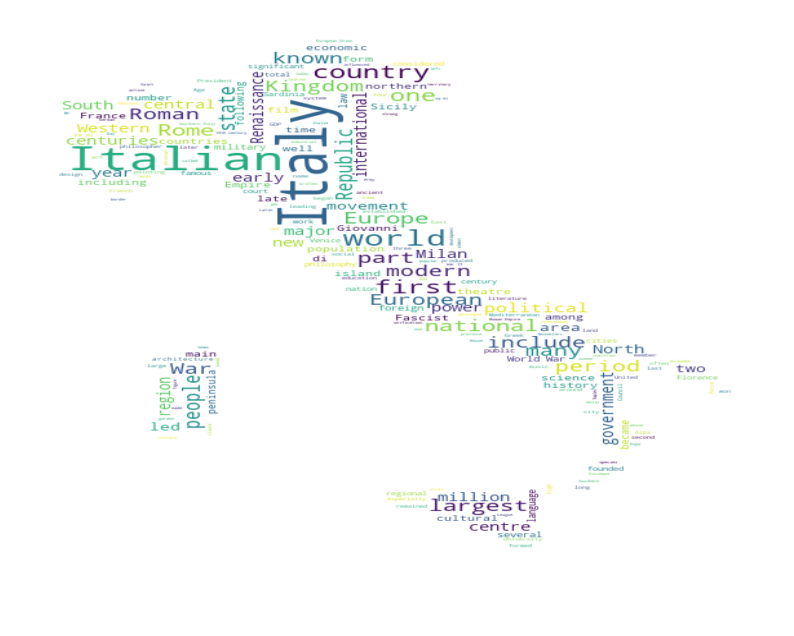

In [170]:
plt.imshow(wc_sa, interpolation='bilinear', aspect='auto')
plt.axis('off')
plt.show()